This script is for calculating the Dispersive surface energy ($\gamma_{d}^{s}$) of a solid sample from Inverse Gas Chromatography measurements, specifically those done on the SEA (Surface energy analyser).  Measured parameters are imported from a csv file and the dispersive surface energy profile (including error and $R^{2}$ value of the fit) is shown and results are output to a different csv file.

In [48]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats,constants
from __future__ import division

# Input data is sorted to be usable

In [49]:
# reads the experimental data file. note: remove other exp details
# Change nrows and skiprows depending on amount of injections
# skiprows skips the first x rows of csv while nrows reads the first x - 1 rows 
f = pd.read_csv(raw_input('Copy path to input file here \nmake sure to insert extra "\\" and remove "" \n'),skiprows=8,nrows=72,
                encoding='utf-16', delimiter='\t')
f

Copy path to input file here 
make sure to insert extra "\" and remove "" 
C:\\Users\\tcd\\Google Drive\\Graphene size study feb 2015\\IGC_raw_data\\Surface_energy\\5000rpm_plus\\4 alkanes 19 may\\5000rpm+_4_alkanes_90C_19_may.csv


,n/nm,Solvent Name,Unit,En. (Stz Max),En. (Stz Com),En. (Pol Max),En. (Pol Com),Interpolated Retention Volume (Max),Interpolated Retention Volume (Com),Column Temperature [Kelvin]
0,0.0075,NONANE,dG (kJ/Mol),NaN,NaN,NaN,NaN,18081.971006,24564.531392,363.150350
1,0.0075,OCTANE,dG (kJ/Mol),NaN,NaN,NaN,NaN,4132.296652,5904.909372,363.152044
2,0.0075,HEPTANE,dG (kJ/Mol),NaN,NaN,NaN,NaN,856.617378,1381.192614,363.150351
3,0.0075,HEXANE,dG (kJ/Mol),NaN,NaN,NaN,NaN,149.254943,316.867115,363.151977
4,0.0075,DICHLOROMETHANE,dG (kJ/Mol),6.292600,7.772685,6.841362,8.271257,14.669496,72.083050,363.151757
5,0.0075,ETHYL ACETATE,dG (kJ/Mol),10.049557,11.316262,7.885039,9.349725,154.808589,640.243408,363.151104
6,0.0100,NONANE,dG (kJ/Mol),NaN,NaN,NaN,NaN,17302.668158,23859.923266,363.150350
7,0.0100,OCTANE,dG (kJ/Mol),NaN,NaN,NaN,NaN,3951.373892,5567.415912,363.152044
8,0.0100,HEPTANE,dG (kJ/Mol),NaN,NaN,NaN,NaN,854.872667,1283.203926,363.150351
9,0.0100,HEXANE,dG (kJ/Mol),NaN,NaN,NaN,NaN,151.448346,301.844037,363.151977


In [50]:
# Removes  columns that have all null values
df = f.dropna(axis =1, how='all')

In [51]:
# Get rid of columns unrelated to dispersive solvents
df.drop(df.columns[2:7],axis=1,inplace=True)
df

,n/nm,Solvent Name,Interpolated Retention Volume (Max),Interpolated Retention Volume (Com),Column Temperature [Kelvin]
0,0.0075,NONANE,18081.971006,24564.531392,363.150350
1,0.0075,OCTANE,4132.296652,5904.909372,363.152044
2,0.0075,HEPTANE,856.617378,1381.192614,363.150351
3,0.0075,HEXANE,149.254943,316.867115,363.151977
4,0.0075,DICHLOROMETHANE,14.669496,72.083050,363.151757
5,0.0075,ETHYL ACETATE,154.808589,640.243408,363.151104
6,0.0100,NONANE,17302.668158,23859.923266,363.150350
7,0.0100,OCTANE,3951.373892,5567.415912,363.152044
8,0.0100,HEPTANE,854.872667,1283.203926,363.150351
9,0.0100,HEXANE,151.448346,301.844037,363.151977


In [52]:
# Renames columns to make life easier
df.rename(columns = {'n/nm' : 'n_nm',
                     'Solvent Name' : 'solvent',
                     'Interpolated Retention Volume (Max)' : 'max',
                     'Interpolated Retention Volume (Com)' : 'com',
                     'Column Temperature [Kelvin]': 'temperature (K)'},inplace=True)

In [53]:
# Gets rid of Specifc solvents
# NOTE: IF MORE OR LESS OR DIFFERENT SOLVENTS USED CHANGE THIS LINE ACCORDINGLY
df = df[(df.solvent != 'DICHLOROMETHANE') & (df.solvent != 'ETHYL ACETATE') & (df.solvent != '1,4-DIOXANE')]
df

,n_nm,solvent,max,com,temperature (K)
0,0.0075,NONANE,18081.971006,24564.531392,363.150350
1,0.0075,OCTANE,4132.296652,5904.909372,363.152044
2,0.0075,HEPTANE,856.617378,1381.192614,363.150351
3,0.0075,HEXANE,149.254943,316.867115,363.151977
6,0.0100,NONANE,17302.668158,23859.923266,363.150350
7,0.0100,OCTANE,3951.373892,5567.415912,363.152044
8,0.0100,HEPTANE,854.872667,1283.203926,363.150351
9,0.0100,HEXANE,151.448346,301.844037,363.151977
12,0.0200,NONANE,15308.691897,21819.738535,363.150350
13,0.0200,OCTANE,3592.959575,5162.925731,363.152044


In [54]:
# Dictionary for map used in next line
solvent_map = {'NONANE': 9,
               'OCTANE' : 8,
               'HEPTANE' : 7,
               'HEXANE' : 6}

In [55]:
# New columns that maps the carbon number from solvent column. Carbon number is needed for calculations
df['carbon num'] = df['solvent'].map(solvent_map)

C:\Users\tcd\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Calculations

Gibbs Free Energy of adsorption is calculated by $\Delta G=RT\ln V_{n}$ ($\frac{kJol}{Mol})$ where $V_{n}$ is the column called 'com'

In [56]:
# Import real gas const
# RTLnVn is the Gibbs free energy of adsorption
R= constants.R
df['RTLnVn'] = R * df['temperature (K)'] * np.log(df['com'])
df

C:\Users\tcd\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,n_nm,solvent,max,com,temperature (K),carbon num,RTLnVn
0,0.0075,NONANE,18081.971006,24564.531392,363.150350,9,30523.290570
1,0.0075,OCTANE,4132.296652,5904.909372,363.152044,8,26219.199560
2,0.0075,HEPTANE,856.617378,1381.192614,363.150351,7,21832.382261
3,0.0075,HEXANE,149.254943,316.867115,363.151977,6,17387.238918
6,0.0100,NONANE,17302.668158,23859.923266,363.150350,9,30435.415804
7,0.0100,OCTANE,3951.373892,5567.415912,363.152044,8,26041.497736
8,0.0100,HEPTANE,854.872667,1283.203926,363.150351,7,21610.192714
9,0.0100,HEXANE,151.448346,301.844037,363.151977,6,17240.579845
12,0.0200,NONANE,15308.691897,21819.738535,363.150350,9,30165.526138
13,0.0200,OCTANE,3592.959575,5162.925731,363.152044,8,25813.750604


In [57]:
# Creates coverage list for the data set
cov = df['n_nm'].unique().tolist()

In [58]:
# List where each element corresponds to part of dataframe with coverage value
cov_sep_list = [df.loc[df.n_nm == i] for i in cov]

In [59]:
# Linear Regression on Gibbs free energy of adsorption vs carbon number
# result is list of tuples containing slope, standard error of slope, r_value etc in a list of tuples
result = [stats.linregress(df['carbon num'],df['RTLnVn']) for df in cov_sep_list]

In [60]:
# Unzips list of tuples to individual tuples
slopes, intercepts,r_values,p_values,std_errs = zip(*result)

In [61]:
# turns tuples to numpy arrays for calculations
slopes = np.array(slopes)

In [62]:
r_values = np.array(r_values)
std_errs = np.array(std_errs)

In [63]:
# Computes R^2 of linear fit
r_sq_arr = r_values ** 2

In [64]:
# values used in surface energy equation (Dorris-Gray)
# T = experiment temperature, y_ch2 = dispersive surface energy of methylene group
# a_ch2 = cross sectional surface area of methylene group

T = f['Column Temperature [Kelvin]'].mean()
y_ch2 = 35.6 + 0.058 * (293 - T)
y_ch2 = y_ch2 / 1000
Na = constants.Avogadro
a_ch2 = 6E-20

Dorris-Gray equation for the calculation of the dispersive surface energy ($\gamma_{d}^{s}$) of a solvent, $unit=\frac{mJ}{m^{2}}$

$$\gamma_{d}^{s}=\frac{1}{4\gamma_{d}^{CH2}}\left(\frac{RT.ln\left[\frac{V_{N,n+1}}{V_{N,n}}\right]}{N_{a}a_{CH2}}\right)^{2}$$

$$\gamma_{d}^{s}=\frac{1}{4\gamma_{d}^{CH2}}\left(\frac{slope}{N_{a}a_{CH2}}\right)^{2}$$

In [65]:
# Dorris-Gray equation for dispersive surface energy
y_d = (1/(4 * y_ch2)) * (slopes/(Na * a_ch2)) ** 2

In [66]:
# Converts from J/m^2 to mJ/m^2
y_d = y_d * 1000

In [67]:
# Calculates error in y_d from standard error in slope of fitting
y_d_err = (y_d * 2 * std_errs) / slopes

# Output and plotting of $\gamma_{d}^{s}$ profile

In [68]:
# Creates dataframe of results with coverage used as index
results_df = DataFrame({'Coverage' : cov,
                       'Dispersive Surface Energy (COM)' : y_d,
                       'Error': y_d_err,
                       'R Square' : r_sq_arr},)
results_df.set_index(keys = 'Coverage',inplace=True)
results_df

,Dispersive Surface Energy (COM),Error,R Square
Coverage,,,
0.0075,116.477830,1.189858,0.999948
0.0100,117.655495,0.427189,0.999993
0.0200,113.936306,2.048242,0.999838
0.0300,112.335933,1.292019,0.999934
0.0500,106.210107,0.805733,0.999971
0.0700,104.981647,2.976849,0.999598
0.0900,103.908594,3.798889,0.999332
0.1000,101.006607,3.153287,0.999513
0.1300,97.765943,3.887438,0.999210


In [69]:
# Exports results to a csv name of your choosing
results_df.to_csv(raw_input('copy output directory you want and put .csv after \n'))

copy output directory you want and put .csv after 
C:\\Users\\tcd\\Google Drive\\Graphene size study feb 2015\\IGC_raw_data\\Surface_energy\\5000rpm_plus\\4 alkanes 19 may\\results_19_may.csv


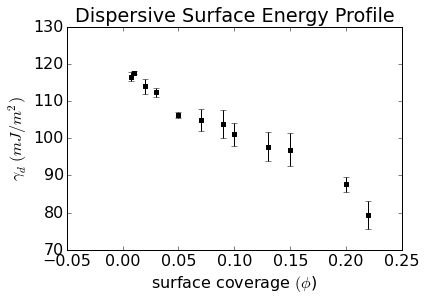

In [70]:
# Plots dispersive surface energy profile with error bars
plt.scatter(cov,y_d,label= 'Dispersive surface energy',c='k',marker='s')
plt.errorbar(cov, y_d,yerr=y_d_err,linestyle = 'None',c='k')
plt.title('Dispersive Surface Energy Profile')
plt.ylabel(r'$\gamma_{d}$ $(mJ/m^{2})$')
plt.xlabel(r'surface coverage $(\phi$)')
plt.rcParams.update({'font.size': 16})